In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics

In [2]:
data1 = pd.read_csv('../source_files/calories.csv')
data2 = pd.read_csv('../source_files/exercise.csv')


In [3]:
data = data2.merge(data1[['User_ID', 'Calories']],on='User_ID',how='left')

In [4]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [5]:
numerical_frame = data.drop('Gender',axis=1)

In [6]:
numerical_frame.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0


C:\Users\poorn\AppData\Local\Temp\ipykernel_23980\1297474051.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_frame[column])
C:\Users\poorn\AppData\Local\Temp\ipykernel_23980\1297474051.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_frame[column])
C:\Users\poorn\AppDa

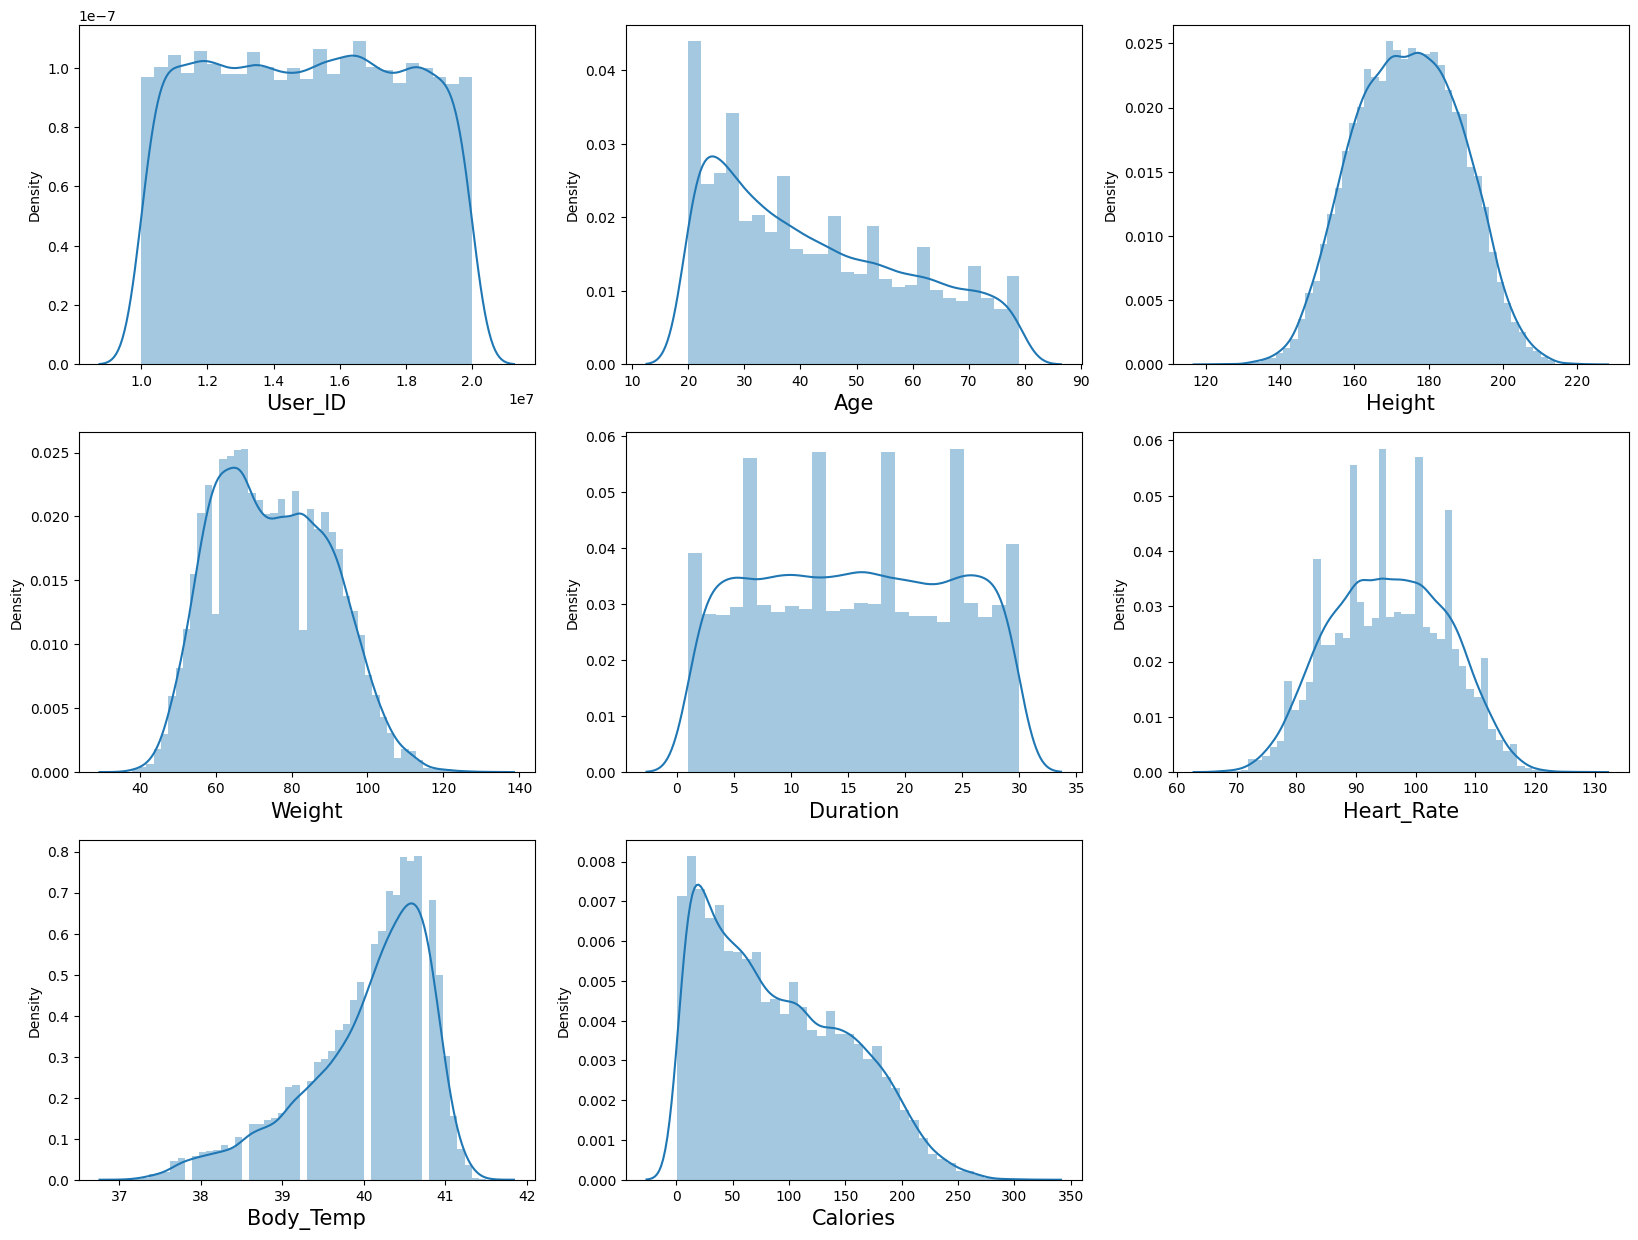

In [7]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in numerical_frame:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(numerical_frame[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

In [8]:
data['Gender'].value_counts()


Gender
female    7553
male      7447
Name: count, dtype: int64

<Axes: >

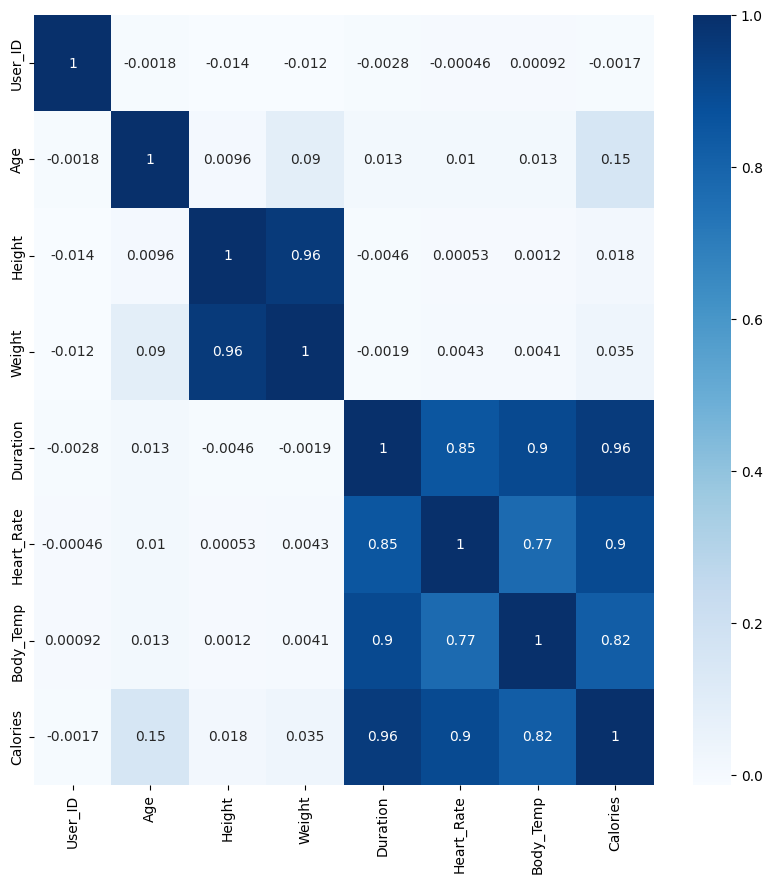

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_frame.corr(), cmap='Blues',annot = True)

In [10]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'].str.lower())
X = data.drop(['User_ID','Calories'], axis=1)
y = data['Calories']
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [17]:

model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=7, objective='reg:squarederror')
model.fit(X_train_scaled, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Mean Squared Error: 2.565436953124807
r2_score is 0.9993643286657565
mean absolute error is 1.0665318115452926
median absolute error is 0.6842708587646484
[172.74144  193.18636   52.302296 ... 121.54143   19.744009 212.18527 ]


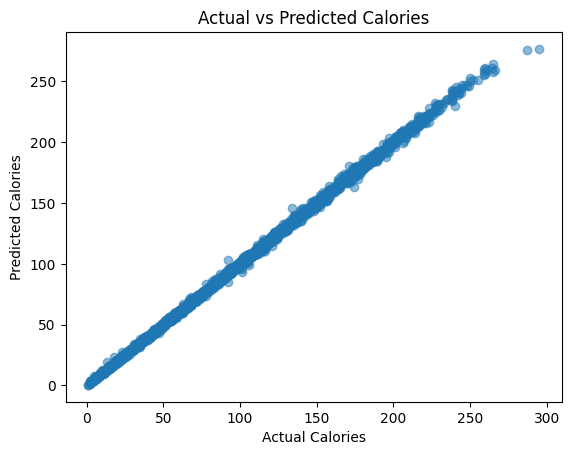

In [18]:

y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2_score = metrics.r2_score(y_test,y_pred)
print(f"r2_score is {r2_score}")
mae = metrics.mean_absolute_error(y_test,y_pred)
print(f"mean absolute error is {mae}")
median_error= metrics.median_absolute_error(y_test,y_pred)
print(f"median absolute error is {median_error}")
plt.scatter(y_test, y_pred, alpha=0.5)
print(y_pred)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()


In [19]:
new_data = ["Female", 21.0, 113.0, 70.3, 90.0, 110.5, 55.0]
new_data_encoded = label_encoder.transform([new_data[0].lower()]) 
new_data_combined = np.concatenate([new_data_encoded, new_data[1:]]).astype(float).reshape(1, -1)
new_data_scaled = scaler.transform(new_data_combined)
new_prediction = model.predict(new_data_scaled)
print(f'Predicted Calories Burnt: {new_prediction[0]}')


Predicted Calories Burnt: 189.14822387695312


C:\Users\poorn\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
pipeline ={
    'model':model,
    'label_encoder':label_encoder,
    'scaler':scaler
}

In [21]:
with open("../new_model.pkl",'wb') as file:
    pickle.dump(pipeline,file)

In [22]:
from tkinter import *
from tkinter import messagebox
from tkinter import font

def center_window(master, width=600, height=400):
    screen_width = master.winfo_screenwidth()
    screen_height = master.winfo_screenheight()
    x = (screen_width // 2) - (width // 2)
    y = (screen_height // 2) - (height // 2)
    master.geometry(f'{width}x{height}+{x}+{y}')


def show_gui():
    try:
        with open('../new_model.pkl', 'rb') as f: 
            pipeline = pickle.load(f)

        label_encoder = pipeline['label_encoder']
        scaler = pipeline['scaler']

        p1 = clicked.get()
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())

        sample = pd.DataFrame({
            'Gender': [p1],
            'Age': [p2],
            'Height': [p3],
            'Weight': [p4],
            'Duration': [p5],
            'Heart_Rate': [p6],
            'Body_Temp': [p7],
        })

        sample['Gender'] = label_encoder.transform(sample['Gender'].str.lower())

   
        sample_scaled = scaler.transform(sample)

        result = pipeline['model'].predict(sample_scaled)

        result_label.config(text=f'Amount of Calories Burnt: {result[0]:.2f}')

    except ValueError as ve:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")
    except FileNotFoundError as fe:
        messagebox.showerror("File Error", "Model file not found. Please check the path.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

master = Tk()
master.title("Calories Burnt Prediction using Machine Learning")

center_window(master)

default_font = font.nametofont("TkDefaultFont")
default_font.configure(size=12)


label = Label(master, text="Calories Burnt Prediction", bg="black", fg="white",font=("Helvetica", 16))
label.grid(row=0, columnspan=2,pady=10)

Label(master, text="Select Gender", font=("Helvetica", 12)).grid(row=1, pady=5)
Label(master, text="Enter Your Age", font=("Helvetica", 12)).grid(row=2, pady=5)
Label(master, text="Enter Your Height", font=("Helvetica", 12)).grid(row=3, pady=5)
Label(master, text="Enter Your Weight", font=("Helvetica", 12)).grid(row=4, pady=5)
Label(master, text="Duration", font=("Helvetica", 12)).grid(row=5, pady=5)
Label(master, text="Heart Rate", font=("Helvetica", 12)).grid(row=6, pady=5)
Label(master, text="Body Temp", font=("Helvetica", 12)).grid(row=7, pady=5)

clicked = StringVar()
clicked.set('female')  # female shall be the default value
options = ['male', 'female']

e1 = OptionMenu(master, clicked, *options)
e1.configure(width=30)
e2 = Entry(master, font=("Helvetica", 12))
e3 = Entry(master, font=("Helvetica", 12))
e4 = Entry(master, font=("Helvetica", 12))
e5 = Entry(master, font=("Helvetica", 12))
e6 = Entry(master, font=("Helvetica", 12))
e7 = Entry(master, font=("Helvetica", 12))

e1.grid(row=1, column=1,padx=10)
e2.grid(row=2, column=1,padx=10)
e3.grid(row=3, column=1,padx=10)
e4.grid(row=4, column=1,padx=10)
e5.grid(row=5, column=1,padx=10)
e6.grid(row=6, column=1,padx=10)
e7.grid(row=7, column=1,padx=10)

Button(master, text="Predict", command=show_gui,font=("Helvetica", 12)).grid(row=8, columnspan=2,pady=10)

result_label = Label(master, text="",font=("Helvetica",16))
result_label.grid(row=9, columnspan=2,pady=10)

mainloop()
